***Improt Libraries***

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import calendar
import numpy as np

In [182]:
df = pd.read_csv(r"C:\Users\yarde\OneDrive\שולחן העבודה\Projects\Data\Bakery.csv")
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


***Data Cleaning*** - check for duplicates and drop them

In [184]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)

1620


***Analysis***

**Item frequency analysis**

In [185]:
item_count= df['Items'].value_counts().reset_index()
item_freq = item_count.rename(columns= {'count':'Frequency'})
item_freq.head()

,Items,Frequency
0,Coffee,4528
1,Bread,3097
2,Tea,1350
3,Cake,983
4,Pastry,815


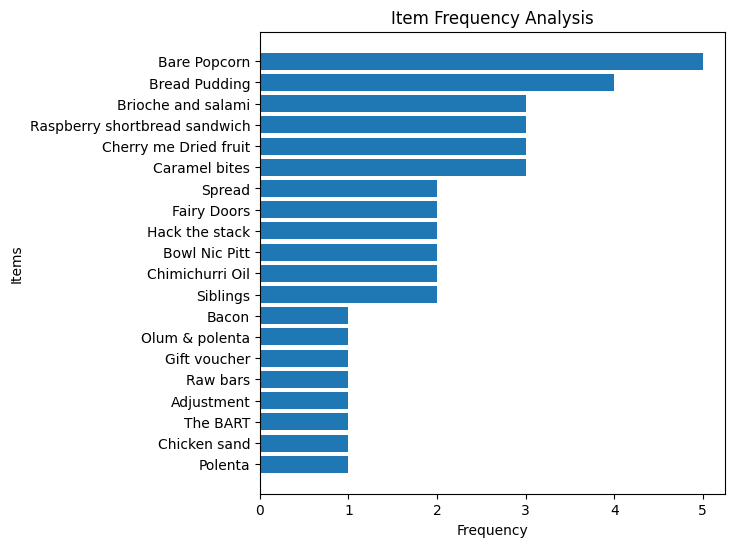

In [186]:
#horizontal bar -top 20 selling Items
item_freq = item_freq.sort_values(by='Frequency', ascending=True)[:20]
fig,ax = plt.subplots(figsize=(6,6))
ax.barh(item_freq['Items'], item_freq['Frequency'])
ax.set_title('Item Frequency Analysis')
ax.set_xlabel('Frequency')
ax.set_ylabel('Items')
plt.show()

**Daypart analysis**

In [187]:
Daypart_frequency= df['Daypart'].value_counts().reset_index()
Daypart_frequency = Daypart_frequency.rename(columns= {'count':'Number Of Trunsactions'})
Daypart_frequency.head()

,Daypart,Number Of Trunsactions
0,Afternoon,10687
1,Morning,7697
2,Evening,490
3,Night,13


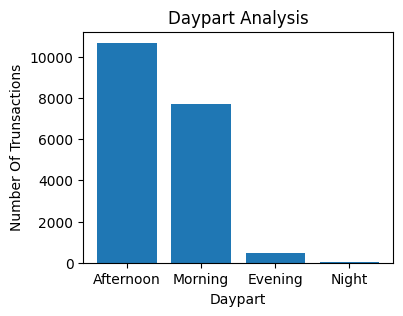

In [188]:
#Bar Chart
fig,ax = plt.subplots(figsize=(4,3))
ax.bar(Daypart_frequency['Daypart'], Daypart_frequency['Number Of Trunsactions'])
ax.set_title('Daypart Analysis')
ax.set_xlabel('Daypart')
ax.set_ylabel('Number Of Trunsactions')
plt.show()

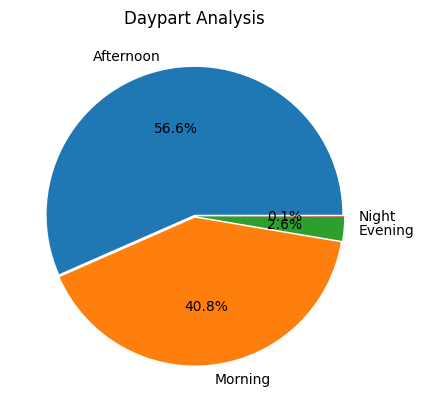

In [189]:
#plotting a pie chart
explode = (0.01, 0.01, 0.01, 0.01)
plt.pie(Daypart_frequency['Number Of Trunsactions'], labels=Daypart_frequency['Daypart'], autopct='%1.1f%%', explode=explode)
plt.title('Daypart Analysis')
plt.show()

**Time series analysis**

In [190]:
#convert to datetime instead of object
df['DateTime'] = pd.to_datetime(df['DateTime'])

df['Date'] = df['DateTime'].dt.date
df['Time'] = df['DateTime'].dt.time
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Date,Time
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016-10-30,09:58:11
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30,10:05:34
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57
5,3,Cookies,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57


In [191]:
print('Dates Of Transactions: from {} until {}'.format(min(df['Date']),max(df['Date'])))
# print(min(df['Date'])),print(max(df['Date']))
print('Total Transaction Count:{}'.format(df.shape[0]))

Dates Of Transactions: from 2016-01-11 until 2017-12-03
Total Transaction Count:18887


In [192]:
#commulative transaction growth over time
df.sort_values('Date', inplace=True)
grouped_df = df.groupby('Date')['Items'].count().reset_index()
grouped_df['commulative_count'] = grouped_df['Items'].cumsum()
grouped_df.head()

,Date,Items,commulative_count
0,2016-01-11,138,138
1,2016-01-12,80,218
2,2016-02-11,157,375
3,2016-02-12,100,475
4,2016-03-11,181,656


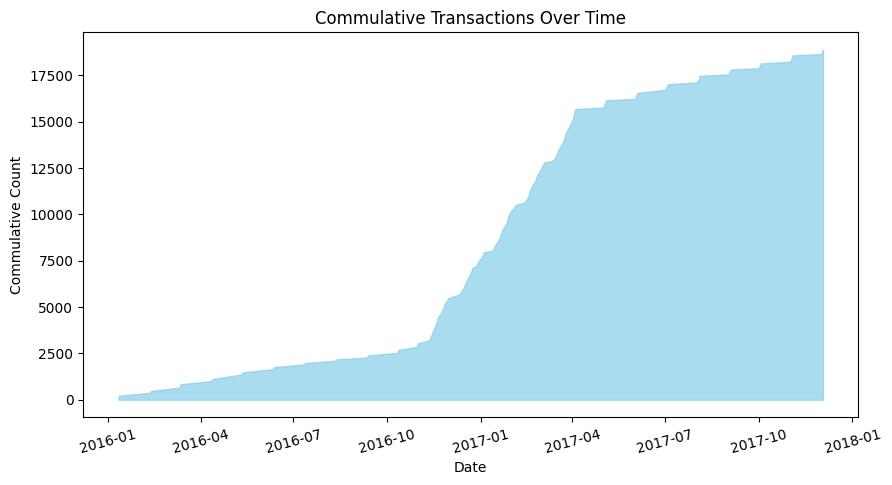

In [201]:
#Area Chart
fig,ax = plt.subplots(figsize = (10,5))
#fill area with color
ax.fill_between(grouped_df['Date'], grouped_df['commulative_count'], color='skyblue', alpha=0.7)
ax.set_title('Commulative Transactions Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Commulative Count')
plt.xticks(rotation= 15)
plt.show()

**Monthly Sales Analysis**

In [205]:
df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year
monthly_sales = df.groupby(['Year','Month'])['Items'].count().reset_index()
monthly_sales.head()

,Year,Month,Items
0,2016,1,218
1,2016,2,257
2,2016,3,360
3,2016,4,275
4,2016,5,362


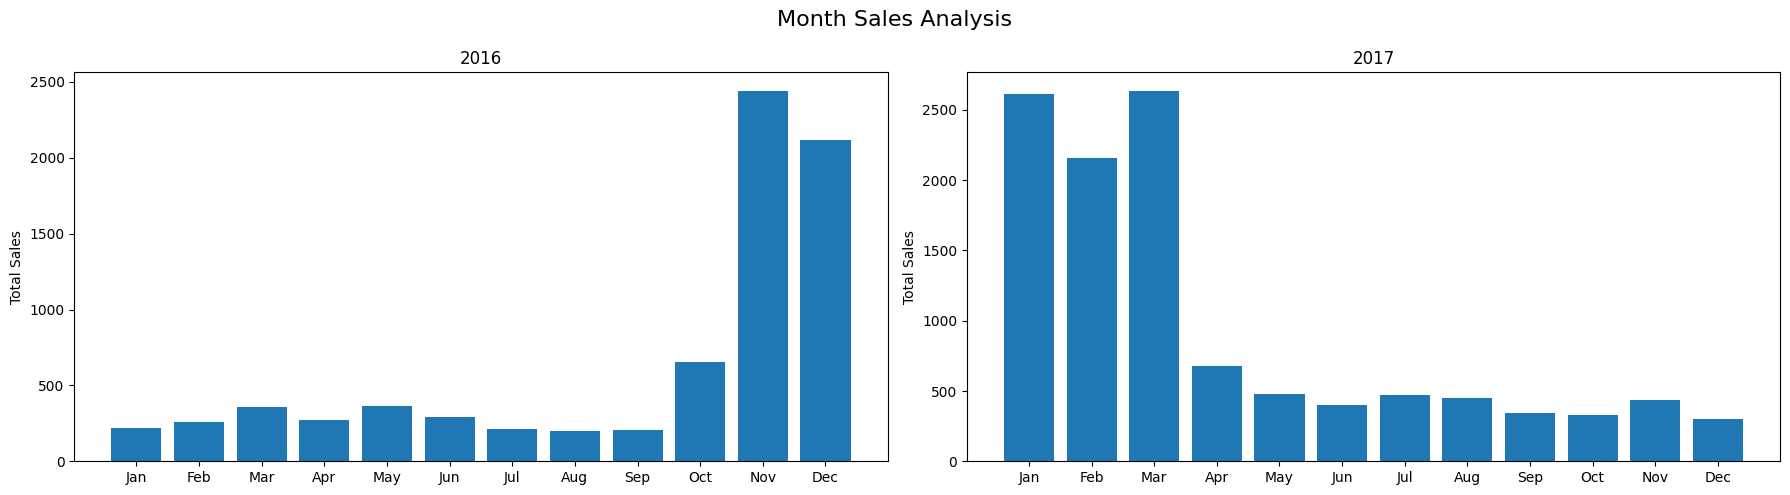

In [227]:
#seperate for each year:
sales_2016 = monthly_sales[monthly_sales['Year'] == 2016]
sales_2017 = monthly_sales[monthly_sales['Year'] == 2017]

#Bar Chart -2016
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
ax1.bar(sales_2016['Month'], sales_2016['Items'])
ax1.set_title('2016')

# Bar Chart - 2017
ax2.bar(sales_2017['Month'], sales_2017['Items'])
ax2.set_title('2017')

for ax in (ax1, ax2):
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels([month[:3] for month in calendar.month_name[1:]])
    ax.set_ylabel('Total Sales')

fig.suptitle('Month Sales Analysis', fontsize=16)
plt.tight_layout()
plt.show()

**Sales Hourly Analysis**

In [236]:
df['Hour'] = df['DateTime'].dt.hour
hourly_sales = df.groupby(['Hour'])['Items'].count().reset_index()
hourly_sales.sort_values(by ='Hour', inplace=True)
hourly_sales.head()

,Hour,Items
0,1,1
1,7,22
2,8,610
3,9,1820
4,10,2407


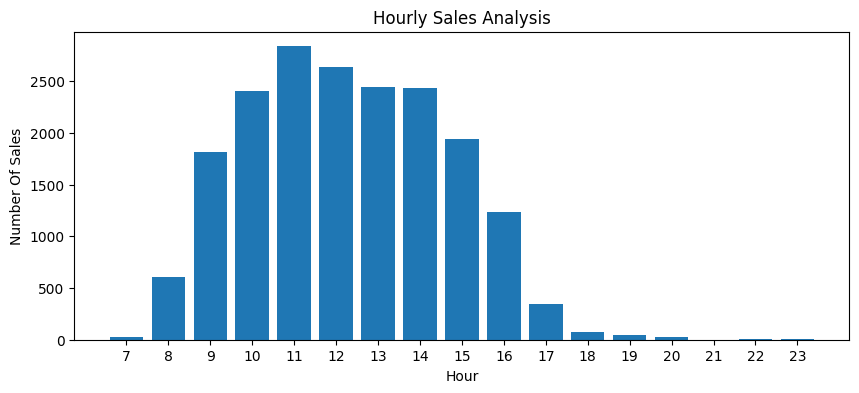

In [253]:
hourly_sales = hourly_sales[hourly_sales['Hour']>=7]

fig,ax = plt.subplots(figsize=(10,4))
ax.bar(hourly_sales['Hour'], hourly_sales['Items'])
ax.set_title('Hourly Sales Analysis')
ax.set_xlabel('Hour')
ax.set_ylabel('Number Of Sales')
ax.set_xticks(np.arange(7, 24))
plt.show()